In [1]:
'''
Importation of the whole package : 

    - Classo
        for computing the solution for a given lambda
    - pathlasso
        for computing the path
    - CV 
        for Cross Validation
    - Bstability, Fstability 
        (the two types of stability selection : Bstability selects the q-BIGGEST indices at a given lambda, 
        and Fstability selects the q-FIRSTS indices that appear in the path)
    - scipy.io as sio
        to load data from a matlab file
    - "little functions" : 
        random_data (for generating random data)
        csv_to_mat (to change a csv matrix to an numpy array)
        rescale (for rescaling a given set of matrices A,C,y )
        model_selection (to compute the theoritical good lambda based on the dimensions of the problem)
'''

from CLasso import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
Prepare the matrices of three different problem : 
        the data COMBO that is in a mat file, 
        the data OTU that is in a csv file,
        the data RANDOM that are generated randomly
'''



file ='Data/COMBODataForLeo.mat'
labels = False #pd.read_excel('Data/VariableLabelsCOMBO.xlsx',index_col=0,header=None)
combo = sio.loadmat(file)
data_combo = (combo['X_cent'],combo['Ceq'],combo['Y_cent'][:,0])
matrices_combo = rescale(data_combo)[0]



loc = "Data/"
otu = csv_to_mat(loc + 'otu_table.csv').astype(float).T
sulfate = csv_to_mat(loc + 'indoxylSulfate.csv')[:,0].astype(float)
data_otu = (np.log(otu+1),np.ones((1,len(otu[0]))), np.log(1+sulfate)  )
matrices_otu = rescale(data_otu)[0]

m,d,d_nonzero,k,sigma =100,200,5,5,0.5
matrices_random,sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True)


sigma =  0.7579505601633519
Running time : 0.01615


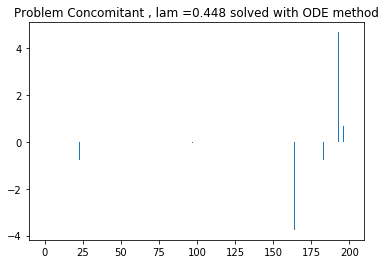

'When random data is used, we can also plot the true solution that we know originally'

In [3]:
'''
Plot of the solution given when we use theoritical lambda and concomitant least square problem. 
'''
matrices = matrices_random # here we choose those datas but one can also use matrice_combo or matrice_otu

m,d = len(matrices[2]),len(matrices[0][0])
lam0 = model_selection(m,d)
X1,s = Classo(matrices,lam0,typ='Concomitant')

'''When random data is used, we can also plot the true solution that we know originally'''
#plt.bar(range(len(sol)),sol),plt.title("True solution Beta-hat"),plt.savefig('True solution Beta-hat.png'),plt.show()

Running time :  1.721


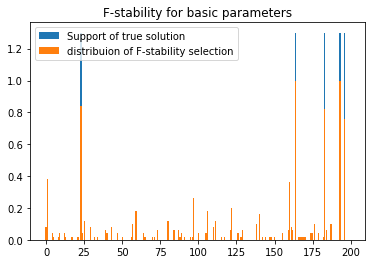

'\ndistrib_BIG = Bstability(matrices)\n# function with all its implicit parameters : \n# Bstability(matrix,lam=0.1, q = 10 ,B = 50, pourcent_nS = 0.5 , problem = \'LS\', meth = \'choose\',plot_time=True)\n\nplt.bar(range(len(support)),support,label="support of true sol" )\nplt.bar(range(len(distrib_BIG)),distrib_BIG,label="distribuion of B-stability selection") \n# plot of the true support to compare\n\nplt.title("B-stability for basic parameters"), plt.legend(),plt.savefig(\'B-stability.png\'), plt.show()\n'

In [4]:
'''
Now we illustrate the stability selection result : we first compute F-stability then B-stability ; 
and if we work with random data, it is interesting to compare the distribution with the true support because
'''

#compute the true support when we use random data (when we know the true support)
support = np.zeros(len(sol))
for i in range (len(sol)):
    if not (sol[i]==0.): support[i] = 1.3

        
distrib_FIRST = Fstability(matrices)
# function with all its implicit parameters : 
# Fstability(matrix, q = 10 ,B = 50, pourcent_nS = 0.5 , problem = 'LS',plot_time=True)

plt.bar(range(len(support)),support,label="Support of true solution" ) # plot of the true support to compare
plt.bar(range(len(distrib_FIRST)),distrib_FIRST,label="distribuion of F-stability selection")
plt.title("F-stability for basic parameters"), plt.legend(),plt.savefig('F-stability.png'), plt.show()



#uncomment this part for Bstability which takes a little bit longer : 
'''
distrib_BIG = Bstability(matrices)
# function with all its implicit parameters : 
# Bstability(matrix,lam=0.1, q = 10 ,B = 50, pourcent_nS = 0.5 , problem = 'LS', meth = 'choose',plot_time=True)

plt.bar(range(len(support)),support,label="support of true sol" )
plt.bar(range(len(distrib_BIG)),distrib_BIG,label="distribuion of B-stability selection") 
# plot of the true support to compare

plt.title("B-stability for basic parameters"), plt.legend(),plt.savefig('B-stability.png'), plt.show()
'''

Running time : 0.19835


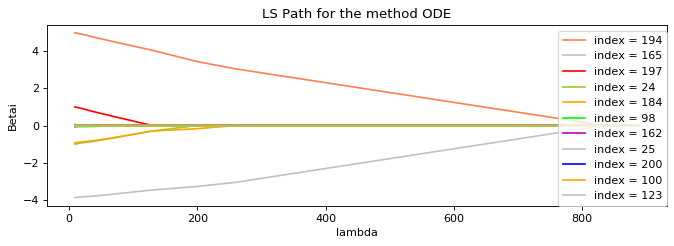

In [5]:
'''
Plot of the solution for a lambda path, 
    one can change the typ to : 'LS' ; 'Concomitant' ; 'Huber' ; 'Concomitant_Huber'
'''




BETAS = pathlasso(matrices,lamin=0.01,typ='LS')

# function with all its implicit parameters : 
# pathlasso(matrix,lambdas=False,n_active=False,lamin=1e-2,typ='LS',meth='ODE',
#            plot_time=True,plot_sol=True,plot_sigm=True,rho = 1.345, compare=False, true_lam = False )

lam = 0.01


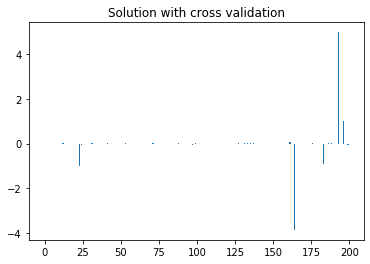

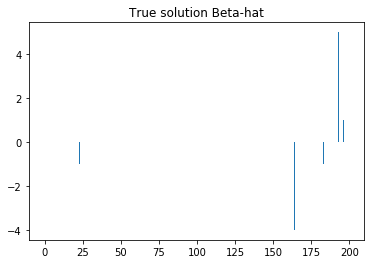

(<BarContainer object of 200 artists>,
 Text(0.5, 1, 'True solution Beta-hat'),
 None)

In [6]:
'''
Plot of the solution for cross-validation, 
    one can change the typ to : 'LS' ; 'Concomitant' ; 'Huber' ; 'Concomitant_Huber'
'''

beta = CV(matrices,5,typ='LS',test = 0.)
# function with all its implicit parameters : 
#CV(matrices,k,typ='LS',test=0.4,lamin=1e-2)

plt.bar(range(len(beta)),beta),plt.title("Solution with cross validation"),plt.show()



# to compare it with true solution when random data
plt.bar(range(len(sol)),sol),plt.title("True solution Beta-hat"),plt.show()
